In [36]:
import project_utils
from __future__ import annotations
import pandas as pd
import pickle
import project_utils
from sklearn.base import ClassifierMixin
import numpy as np
from typing import Tuple
from pandas import DataFrame
import csv_maker
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
#pd.set_option('display.max_columns', None)
#pd.set_option('display.expand_frame_repr', False)
#pd.set_option('max_colwidth', None)
import time
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from scipy.stats import uniform
np.random.seed(42)



In [40]:
#load the pre-selected features from stepwise
sfs = pickle.load(open('stepwise_selected_features.pickle', 'rb'))
print(sfs.k_feature_names_.__len__())


23


In [23]:
#setup training data
_x, y, enc = project_utils.Read_data_output_class4()
_x = project_utils.scaling(_x)
x_step = _x[:,sfs.k_feature_idx_]
x_pca, pca_encoder = project_utils.training_with_PCA(_x,15)

In [24]:
#run models
adjusted_weights = {0: 0.24, 1: 0.05, 2: 0.16, 3: 0.55}

c = np.linspace(0,50,100)
l1 = np.linspace(0,1,100)
rf = RandomForestClassifier()
#rf_params = dict(min_samples_split=[2,3,4,5,6], min_samples_leaf=[1,2,3,4,5,6], class_weight=[adjusted_weights])
rf_params = dict(min_samples_split=[2,3,4,5,6], min_samples_leaf=[2,3,4,5,6], class_weight=[adjusted_weights])

lr = LogisticRegression(max_iter=1000)
lr_params = dict( penalty=['l2'], solver=['lbfgs', 'newton-cg', 'sag'], class_weight=[adjusted_weights], multi_class=['multinomial'])

lre = LogisticRegression(max_iter=1000)
lre_params = dict( l1_ratio=l1, penalty=['elasticnet', 'l1', 'l2'], solver=['saga'], class_weight=[adjusted_weights], multi_class=['multinomial'])

nb = GaussianNB(priors=np.array([0.24, 0.05, 0.16, 0.55]))
nb_params = dict()

svm = SVC()
svm_params = dict(kernel=['sigmoid', 'rbf', 'poly'], degree=[2,3], class_weight=[adjusted_weights], probability=[True], decision_function_shape=['ovo', 'ovr'])
#svm_params = dict(C=c,  kernel=['sigmoid', 'rbf', 'poly'], class_weight=[adjusted_weights], probability=[True])


models = [rf,  lre,  nb, svm]
model_params = [rf_params, lre_params, nb_params, svm_params]


model_dict = {}
model_results = None
for m, mp in zip(models, model_params):
    results, md = project_utils.runModelCV(model=m, model_params=mp, x=x_step, y=y, strategy='stepwise', n_iterations=5, k_folds=5)
    if model_results is None:
        model_results = results
    else:
        model_results = pd.concat([model_results, results])
    model_dict.update(md)
for m, mp in zip(models, model_params):
    results, md = project_utils.runModelCV(model=m, model_params=mp, x=x_pca, y=y, strategy='pca', n_iterations=5, k_folds=5)
    if model_results is None:
        model_results = results
    else:
        model_results = pd.concat([model_results, results])
    model_dict.update(md)

runModelCV call done


/opt/anaconda3/envs/iml/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/iml/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/iml/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/iml/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/iml/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/iml/lib/python3.9/site-packages/sklearn/linea

runModelCV call done
runModelCV call done


/opt/anaconda3/envs/iml/lib/python3.9/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 12 is smaller than n_iter=25. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


runModelCV call done
runModelCV call done


/opt/anaconda3/envs/iml/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/iml/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/iml/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/iml/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/iml/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/iml/lib/python3.9/site-packages/sklearn/linea

runModelCV call done
runModelCV call done


/opt/anaconda3/envs/iml/lib/python3.9/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 12 is smaller than n_iter=25. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


runModelCV call done


In [25]:
#make testing data from the real set
_test_x, test_y, _enc = project_utils.Read_data_output_class4('npf_test.csv')
_test_x = project_utils.scaling(_test_x)
test_x_step = _test_x[:,sfs.k_feature_idx_]
test_x_pca = pca_encoder.fit_transform(_test_x)

In [26]:
model_results.head()

,Features,Train Accuracy,Train Perplex,Validation Accuracy,Validation Perplex,Params
RandomForestClassifier--184837-50,stepwise,0.913043,1.393764,0.617486,2.487329,"{'min_samples_split': 4, 'min_samples_leaf': 2..."
RandomForestClassifier--184837-68,stepwise,0.902174,1.486145,0.622951,2.538111,"{'min_samples_split': 4, 'min_samples_leaf': 2..."
RandomForestClassifier--184838-43,stepwise,0.913043,1.370490,0.625683,2.815113,"{'min_samples_split': 4, 'min_samples_leaf': 2..."
RandomForestClassifier--184838-61,stepwise,0.923077,1.492414,0.634877,2.625337,"{'min_samples_split': 4, 'min_samples_leaf': 2..."
RandomForestClassifier--184838-93,stepwise,0.934066,1.435387,0.648501,2.700257,"{'min_samples_split': 4, 'min_samples_leaf': 2..."


In [27]:
#do final evaluation
names = []
ids = []
accuracy = []
strat = []
for modelName in model_dict.keys():
    if  np.all(model_results.loc[modelName, 'Features'] == 'pca'):
        accuracy.append(model_dict[modelName].score(X=test_x_pca, y=test_y))
        strat.append('pca')
    else:
        accuracy.append(model_dict[modelName].score(X=test_x_step, y=test_y))
        strat.append('stepwise')
    na, uid = modelName.split('--')
    names.append(na)
    ids.append(uid)
dftest = pd.DataFrame({'model':names, 'Features': strat, 'accuracy': accuracy}, index=ids)

In [28]:
dftest.sort_values('accuracy', ascending=False).head(5).to_csv('best_models.csv')

In [29]:
dftest.groupby(['model', 'Features']).max().to_csv('max_accuracy.csv')

In [30]:
dftest.groupby(['model', 'Features']).min()

accuracy
model                  Features          
GaussianNB             pca       0.415544
                       stepwise  0.368912
LogisticRegression     pca       0.390674
                       stepwise  0.598964
RandomForestClassifier pca       0.377202
                       stepwise  0.629016
SVC                    pca       0.539896
                       stepwise  0.541969

In [31]:
dftest.groupby(['model', 'Features']).mean().to_csv('mean_accuracy.csv')

In [32]:
dftest.sort_values('accuracy', ascending=False).head()

,model,Features,accuracy
184839-12,RandomForestClassifier,stepwise,0.699482
184839-28,RandomForestClassifier,stepwise,0.692228
184839-25,RandomForestClassifier,stepwise,0.691192
184839-47,RandomForestClassifier,stepwise,0.689119
184838-93,RandomForestClassifier,stepwise,0.683938


In [35]:
#format like this to inspect an individual model
bestModel = model_dict[f'RandomForestClassifier--184839-12']

In [37]:
ency = pickle.load(open('y_encoder.pickle', 'rb'))
yhat = bestModel.predict(test_x_step)
cm = confusion_matrix(ency.inverse_transform(test_y), ency.inverse_transform(yhat) )

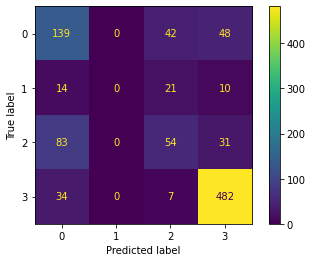

In [38]:
ConfusionMatrixDisplay(cm).plot()